# Zadanie 1

Zadanie polega na znalezieniu wielomianu aproksymacyjnego dla populacji USA w latach 1900 - 1980 na podstawie 9 punktków (populacja co 10 lat) dla $n=1,...,6$, gdzie $n$ to stopień wielomianu. Wielomian należy ekstrapolować na rok 1990 oraz porównać błędy względne od wartości prawdziwej dla każdego $n$

## Biblioteki

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

- `pandas` - biblioteka do przetwarzania danych
- `numpy` - biblioteka do obliczeń algebraicznych
- `matplotlib.pyplot` - biblioteka do rysowania wykresów
- klasa `Polynomial` z biblioteki `numpy` słuząca do ewaluacji wielomianów

## Funkcje i dane

In [2]:
def build_matrix(m, n, xs):
    n += 1
    matrix = np.zeros(shape=(m, n))
    for i in range(m):
        for j in range(n):
            matrix[i][j] = xs[i]**j
    return matrix

- `build_matrix` - funkcja służąca do zbudowania macierzy $m{\times}n$ do aproksymacji

In [3]:
population_1990 = 248_709_973
data = np.array([[1900, 76_212_168],
                 [1910, 92_228_496],
                 [1920, 106_021_537],
                 [1930, 123_202_624],
                 [1940, 132_164_569],
                 [1950, 151_325_798],
                 [1960, 179_323_175],
                 [1970, 203_302_031],
                 [1980, 226_542_199]
                ], dtype=np.int64)
df = pd.DataFrame(data, columns=["year","population"])
df

,year,population
0,1900,76212168
1,1910,92228496
2,1920,106021537
3,1930,123202624
4,1940,132164569
5,1950,151325798
6,1960,179323175
7,1970,203302031
8,1980,226542199


**Tab. 1** - populacja USA w latach 1900 - 1980

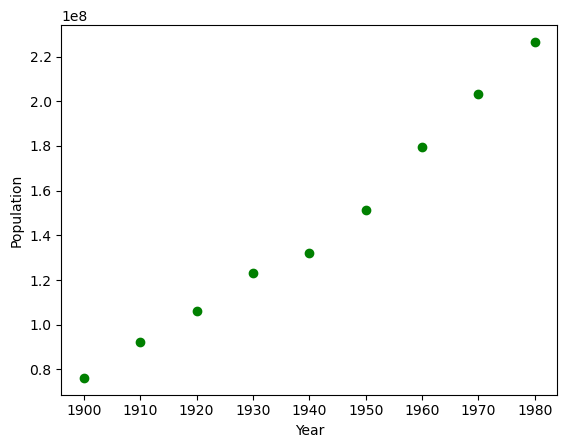

In [4]:
plt.xlabel("Year") 
plt.ylabel("Population")
plt.scatter(df["year"], df["population"], color ="green")
plt.show()

**Wyk. 1** - populacja USA w latach 1900 - 1980

## Aproksymacja

In [5]:
years = np.array(df["year"])
population = np.array(df["population"])
y = population.T
m = len(years)

In [6]:
errors = []
sum_of_error_squares = []
for n in range(7):
    A = build_matrix(m, n, years)
    left = np.matmul(A.T, A)
    right = np.matmul(A.T, y)
    c = np.linalg.solve(left, right).T
    p = Polynomial(c)
    relative_error = round((abs(population_1990 - p(1990))/population_1990) * 100, 2)
    sum_of_error_squares.append(sum((population - p(years))**2))
    errors.append(relative_error)

Wyliczenie wielomianu aproksymacjnego dla kazdego $n$ ze wzoru $A^TAc=A^Ty$ gdzie:

 - $A$ to macierz $m{\times}n$ postaci $a_{ij}=x_i^j$, $i=0,...,m$, $j=0,...,n$
 - $y$ to wartości populacji w latach $m=1900,1910,...,1980$
 - $c$ to szukana macierz współczynników wielomianu aproksymacyjnego, który ma postać $\sum_{j=0}^{n}c_jx^j$

Dodatkowe wektory przechowujące dane:

- `errors` - tablica przechowująca relatywne błędy ekstrapolacji wielomianów na rok 1990 dla każdego $n$
- `sum_of_error_squares` - tablica przechowująca sumę kwadratów błędów dla punktów $m=1900,1910,...,1980$ dla każdego $n$. Sumy te posłużą do wyliczenia $\text{AICc}$

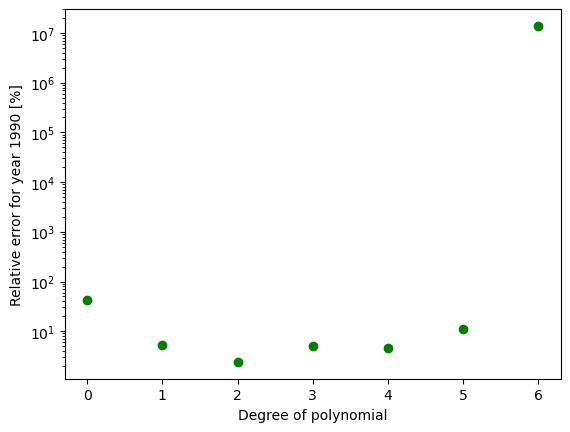

In [7]:
plt.scatter(range(7), errors, color="green")
plt.xlabel("Degree of polynomial")
plt.ylabel("Relative error for year 1990 [%]")
plt.yscale("log")
plt.show()

**Wyk. 2** - błąd względny aproksymacji dla roku 1990 w zależności od stopnia wielomianu

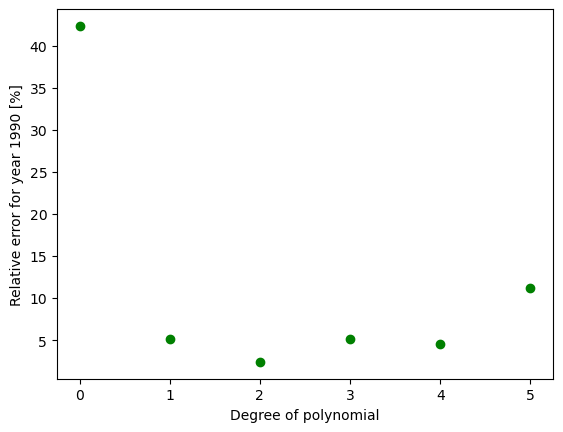

In [8]:
plt.scatter(range(6), errors[:-1], color="green")
plt.xlabel("Degree of polynomial")
plt.ylabel("Relative error for year 1990 [%]")
plt.show()

**Wyk. 3** - błąd względny aproksymacji dla roku 1990 w zależności od stopnia wielomianu dla $n=1,...,5$

In [9]:
smallest_error = min(errors)
best_degree = errors.index(smallest_error)
print(f"Smallest relative error: {smallest_error}% for polynomial of degree {best_degree}")

Smallest relative error: 2.41% for polynomial of degree 2


Najmniejszy błąd względny wynosi $2.41\%$ dla $n=2$

In [10]:
A = build_matrix(m, 2, years)
left = np.matmul(A.T, A)
right = np.matmul(A.T, y)
c = np.linalg.solve(left, right).T
p = Polynomial(c)
annual_points = np.arange(start=1900, stop=1991, step=1)
population_approx = p(annual_points)

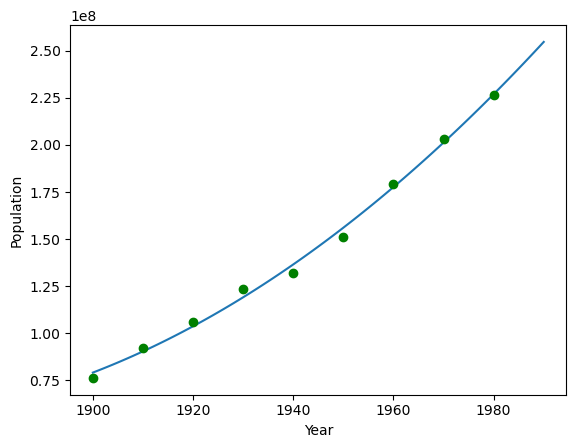

In [11]:
plt.plot(annual_points, population_approx)
plt.scatter(years, population, color="green", zorder=2)
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

**Wyk. 4** - wykres wielomianu aproksymacyjnego drugiego stopnia

In [12]:
akaikes = []
for n in range(7):
    k = n+1
    AIC = 2*k + m * np.log(sum_of_error_squares[n]/m)
    AICc = AIC + (2*k*(k+1))/(m-k-1)
    akaikes.append(AICc)
df_akaike = pd.DataFrame(akaikes, columns=["AICc"])
df_akaike

,AICc
0,321.010975
1,289.056478
2,279.453374
3,284.880402
4,296.259105
5,327.750166
6,687.137418


**Tab. 2** - $\text{AICc}$ dla różnych stopni wielomianu aproksymacyjnego

$\text{AIC}$ to kryterium informacyjne Akaikego wyliczane ze wzoru $\text{AIC}=2k+m\ln\left(\frac{\sum_{i=0}^{m-1}\left[y_i-\hat{y}(x_i)\right]^2}{m}\right)$, gdzie

- $k$ to liczba parametrów modelu, która dla wielomianów aproksymacyjnych jest jest równa $n+1$, gdzie $n$ to stopień wielomianu
- $m$ to liczba punktów

Liczba punktów jest mała, $\frac{m}{k}<40$, zatem do obliczeń należy dodać składnik korygujący $\text{AICc}=\text{AIC}+\frac{2k(k+1)}{n-k-1}$  
Im mniejszy $\text{AICc}$ tym lepszy model. Warto dodać, że $\text{AIC}$ może służyć jedynie do porównywania jakości różnych modeli dla danego problemu, nie można go wykorzystywać do bezwzględnej oceny jakości modeli.

In [13]:
best_AICc = min(akaikes)
best_degree = akaikes.index(best_AICc)
print(f"Best AICc is %.3f, for polynomial of degree {best_degree}" % best_AICc)

Best AICc is 279.453, for polynomial of degree 2


Najlepsze $\text{AICc}$ wynosi $279.453$ dla $n=2$

## Wnioski

Zarówno błąd względny ekstrapolacji do roku 1990 jak i $\text{AICc}$ wykazały, że najlepszym wielomianem aproksymującym dane jest wielomian stopnia $n=2$. Wielomian ten jest w stanie oddać zmiennośc danych, ale jednocześnie ma wystarczająco niski stopień aby zredukować szum oraz błędy w danych.

# Zadanie 2

## Biblioteki

In [14]:
import scipy.integrate as spi
import scipy.special as sps
from numpy.polynomial.chebyshev import Chebyshev

Poza bibliotekami wykorzystanymi w zadaniu 1 dodatkowo użyte zostały:

- `scipy.integrate` - funkcja `quad` z tej biblioteki została użyta do policzenia całek
- `scipy.special` - funkcja `chebyt` została użyta to wyznaczenia kolejnych wielomianów Czebyszewa
- klasa `Chebyshev` z biblioteki `numpy` służąca do ewaluacji szerego Czebyszewa (sumy kolejnych wielomianów)

## Funkcje

In [15]:
def f(x):
    return np.sqrt(x)

def w(t):
    if t*t == 1:
        return 0
    return (1 - t*t)**(-1/2)
def t(x):
    return x-1

- `f` - $f(x)=\sqrt{x}$ - funkcja aproksymowana
- `w` - $w(t)=(1-t^2)^{-\frac{1}{2}}$ - funkcja wagi dla wyliczania wielomianów ortogonalnych
- `t` - $t(x)=x-1$ - funkcja transformująca punkty z przedziału $[0,2]$ do przedziału $[-1,1]$

## Aproksymacja

Funkcja $f$ będzie aproksymowana za pomocą wielomianu $p$ 2-go stopnia.

In [16]:
c = []
for i in range(3):
    cb = sps.chebyt(i)
    f1 = lambda x: cb(t(x))*w(t(x))*f(x)
    numerator = spi.quad(f1, 0, 2)[0]
    denominator = np.pi if i == 0 else np.pi/2
    c.append(numerator/denominator)

Współczynniki $c_i$ można wyliczyć ze wzoru
$$c_k=\frac{\left<f,T_k\right>}{\left<T_k,T_k\right>}$$
Gdzie $T_k$ to wielomian Czebyszewa $k$-tego stopnia, dodatkowo
$$\left<f,g\right>=\int_{a}^{b}w(x)f(x)g(x)dx$$
gdzie $w(x)$ to funkcja wagi.

W celu uproszczenia obliczeń można skorzystać z zależności
$$ \left<T_k,T_k\right>=\left\{
\begin{array}{ll}
\pi & k=0\\
\frac{\pi}{2} & k>0\\
\end{array} 
\right.  $$


In [17]:
p = Chebyshev(c, domain=(0,2))
xs = np.arange(start=0, stop=2.01, step=0.01)
ys = f(xs)
ys_approx = p(xs)

Za pomocą klasy `Chebyshev` można przeprowadzić ewaluację wielomianiu Czebyszewa. Parametr `domain` mówi o tym, z jakiej dziedziny punkty będą transformowane na punkty z przedziału $[-1,1]$

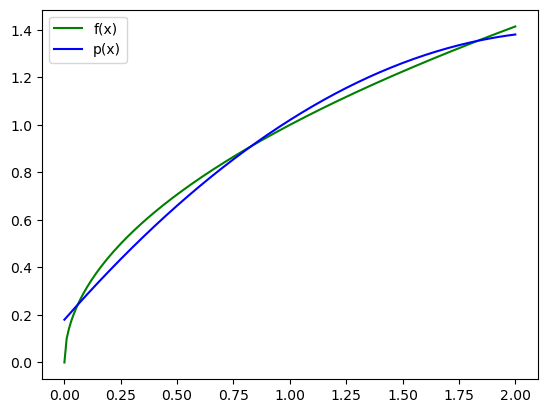

In [18]:
plt.plot(xs, ys, color="green", label="f(x)")
plt.plot(xs, ys_approx, zorder=2, color="blue", label="p(x)")
plt.legend()
plt.show()

**Wyk. 5** - funkcja $f$ oraz wielomian aproksymujący drugiego stopnia $p$

In [19]:
print("Approximating Chebyshev series:")
print(p)

Approximating Chebyshev series:
0.90031632 + 0.60021088 T_1(x) - 0.12004218 T_2(x)


Wielomian aproksymacyjny: $p(x)\approx0.9+0.6T_1(x)-0.12T_2(x)$